# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [3]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd 

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# IMPORT OUR LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR MODEL
from sklearn.ensemble import RandomForestRegressor 


# IM LEAVING THERES HERE BECAUSE IM NICE
# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats

%matplotlib inline

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [5]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-white.csv')


# DISPLAY THE FIRST 5 ROWS
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6


# Inspect our data using `df.describe()` function.

In [6]:
# Inspect our data using `df.describe()` function.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000
mean,6.854210,0.278221,0.334139,6.393736,0.045791,35.310035,138.383507,3.188144,0.489871,10.512565,5.874719
std,0.843637,0.100831,0.121048,5.072990,0.021850,17.011384,42.509982,0.151011,0.114151,1.229755,0.880446
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,3.820000,1.080000,14.200000,8.000000


# Check for Nulls.

In [9]:
# Check for Nulls.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check for Duplicates

In [10]:
# Check for Duplicates

df.duplicated().sum()

937

In [11]:
# Remove duplicates
print(df.shape)
df = df.drop_duplicates()


# Sanity check
print(df.shape)

(4893, 11)
(3956, 11)


# Visualize our data to discover outliers.
* Use `sns.pariplot`

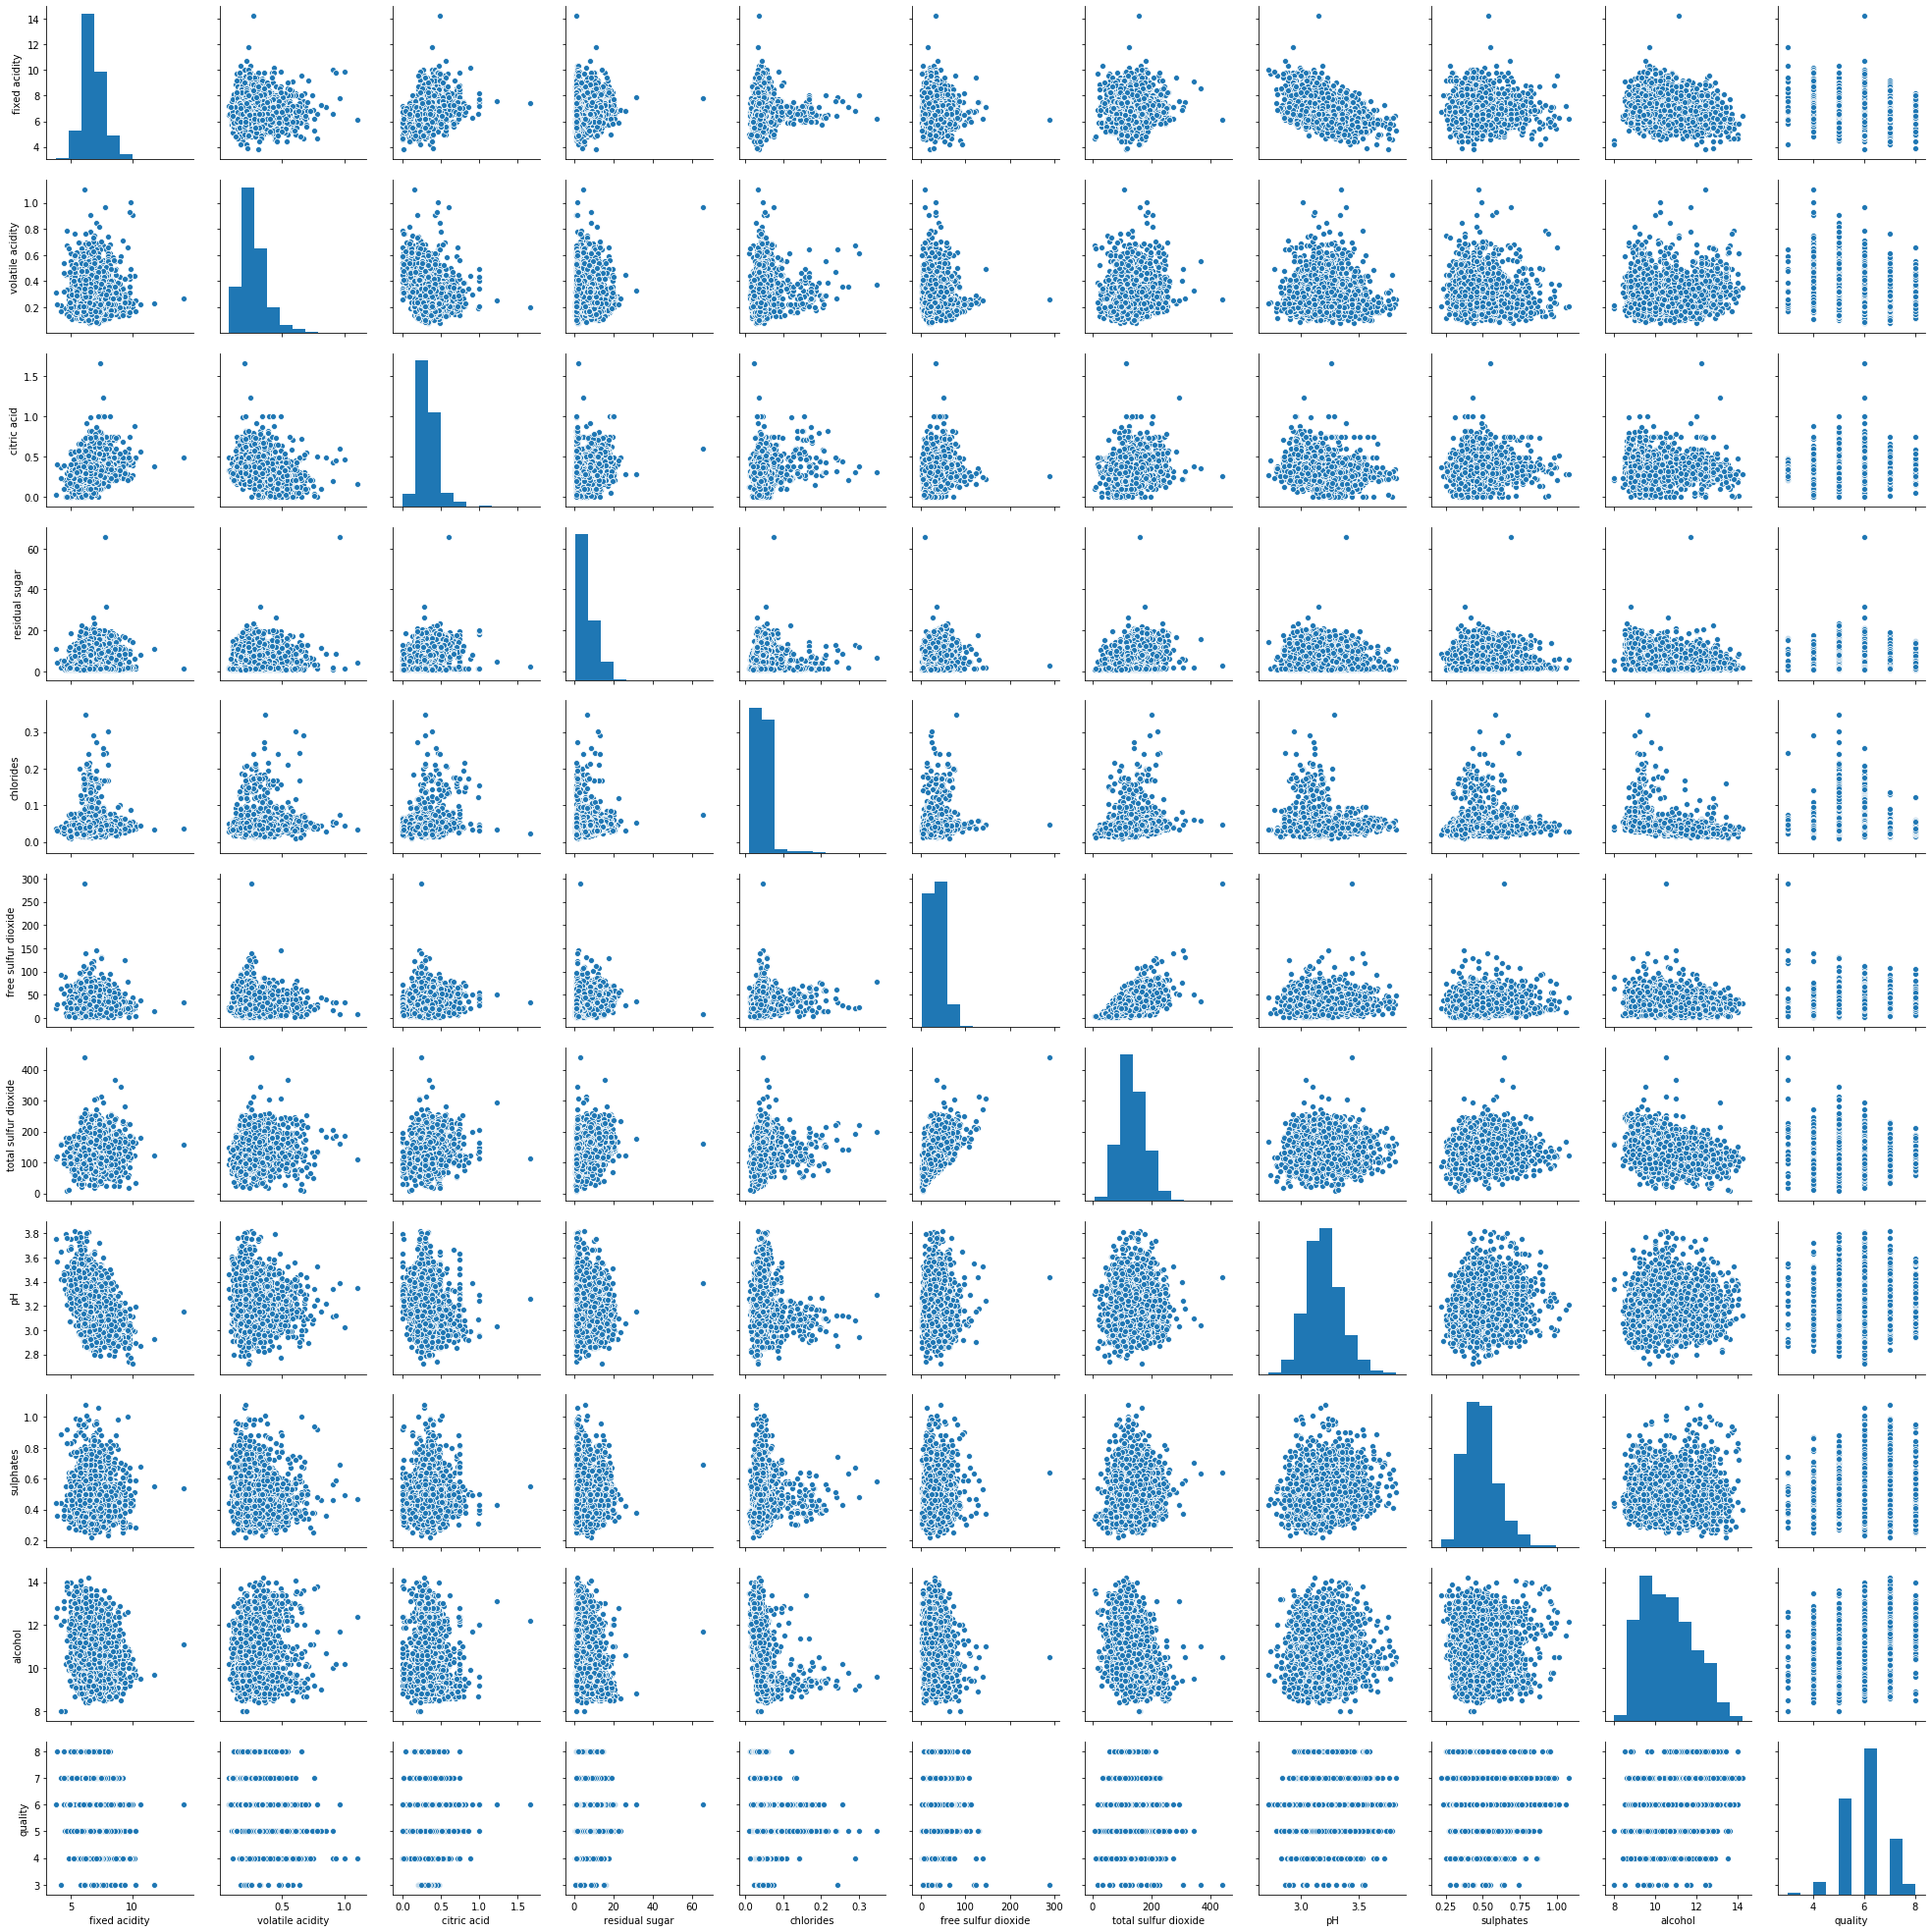

In [12]:
# Visualize our data to discover outliers.
sns.pairplot(data=df)


___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [13]:
# Keep this for later
original_cols = df.columns

# Set the columns you want to remove outliers for
target_cols = ['total sulfur dioxide', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'pH',
       'sulphates', 'alcohol']

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col +"_zscore"
    
    # Set the new column equal to the score
    df[new_col_name]=stats.stats.zscore(df[col])
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_col_name] = abs(df[new_col_name])
    
    # Append the new column name our our z_score_cols list for easier access for later.

    z_score_cols.append(new_col_name)
    

condition = df[z_score_cols] < 3

# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

# Apply our condition to our dataframe and replace our current dataframe with the applied condition.
df = df[condition]

print('After removal of outliers', df.shape)

Before removal of outliers (3956, 21)
After removal of outliers (3629, 21)


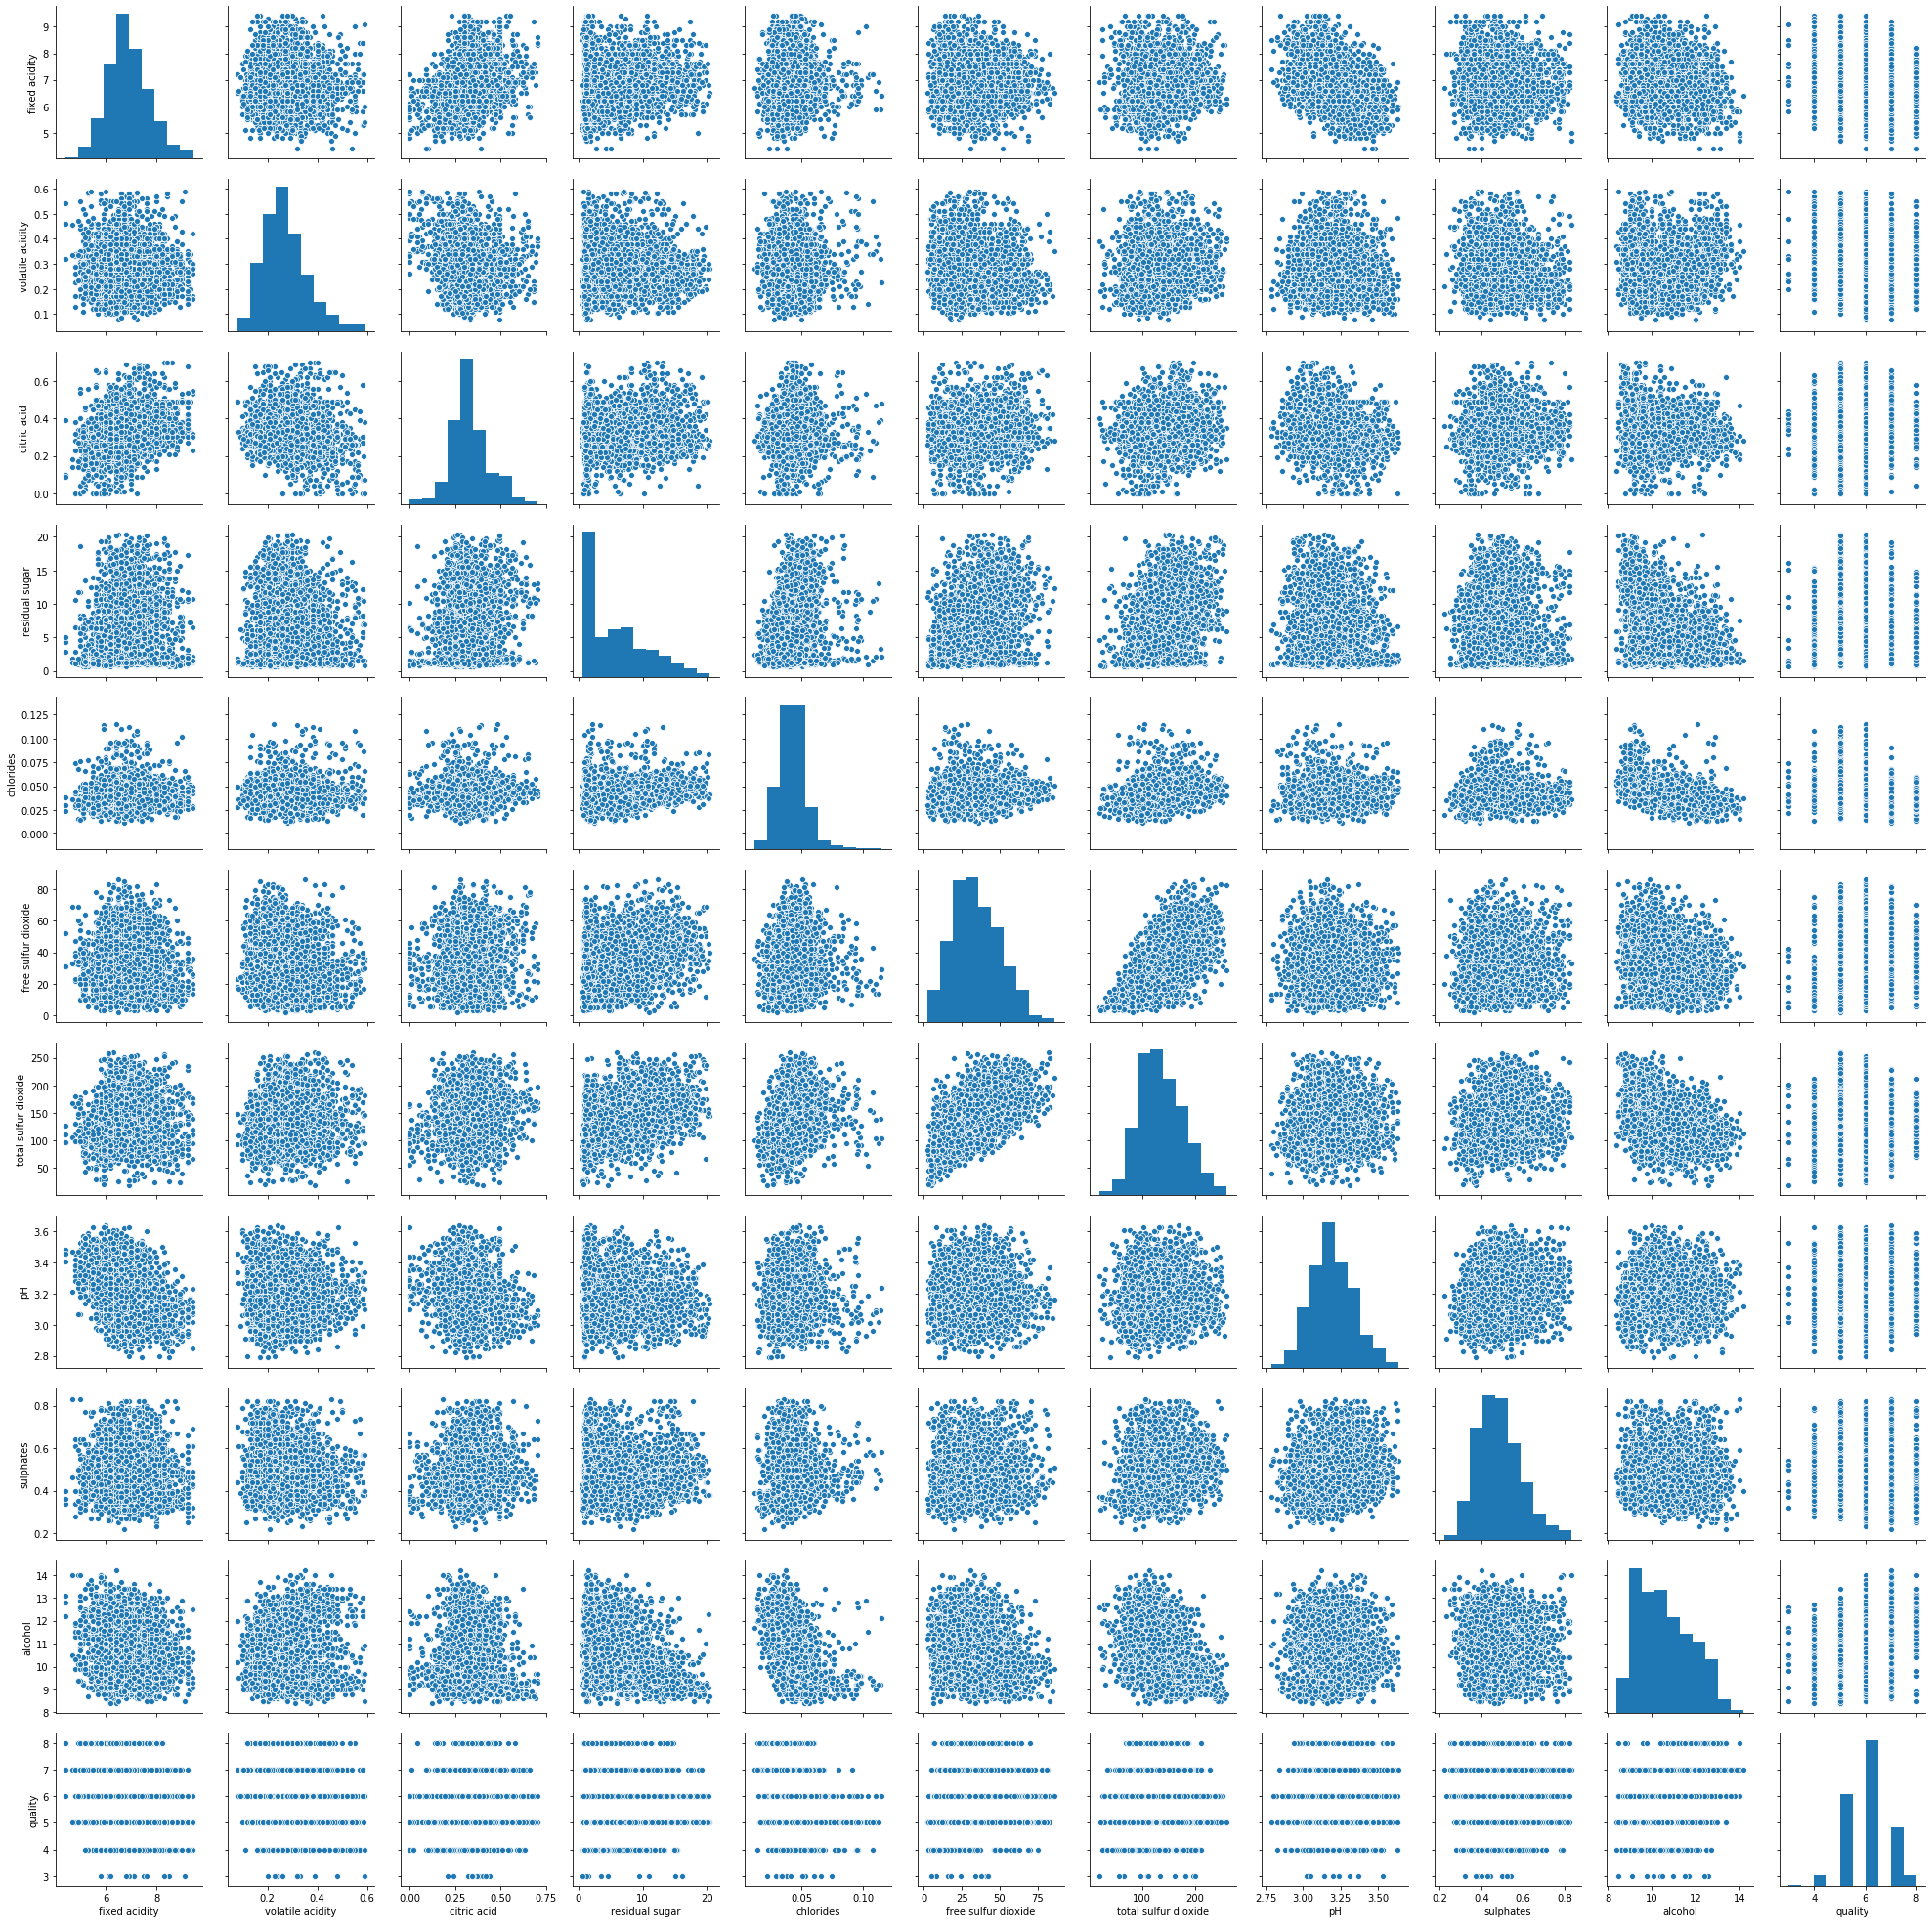

In [14]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed. 
sns.pairplot(df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

In [16]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP
for features in all_features:
    sns.replot(data=df, y=feature, x ="quality", kind="line", height=5, aspect=1)

AttributeError: module 'seaborn' has no attribute 'replot'


# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [18]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid',
               'chlorides',  'pH', 'sulphates', 'alcohol']

target = ['quality']

In [19]:
# Define your X and y variables
X = df[selected_features].values


# 
y = df[target].values

In [20]:
# 3. Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [24]:
# 1. Initialize our Linear Regression model.
model = LinearRegression()



In [25]:
# 2. Use our training data to fit aka train our model.
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [26]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [27]:
# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.29953953790809495
Mean Absolute Error: 0.5734819425765462


# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [31]:
import pickle

# NAME YOUR MODEL 
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, "wb"))



___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [33]:
# Do complete Random Forest Regression model here...
df.head()
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol']

target = ['quality'] 

# ISOLATE THE DATA TO JUST OUR FEATURES
X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = RandomForestRegressor(random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)




#

C:\Users\16464\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\16464\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [34]:
# 1. Which model proved to have better scores.
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

print('Your answer here': )

R-Squared Score: 0.3476206503262331
Mean Absolute Error: 0.5524793388429752
Your answer here


In [ ]:
# 2. Why do you think that is...?


print('Your answer here')